In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecommerce-dataset-for-predictive-marketing-2023/ECommerce_consumer behaviour.csv


<a id="1"></a>
<p style="background-color:#be6f37;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> BUSINESS UNDERSTANDING</p>

Hunter's e-grocery is a well-known French brand based in Brittany that offers a new generation of e-grocery and lifestyle products. With a presence in ten countries, Hunter's e-grocery continually seeks new ways to anticipate and meet customer demands, building strong loyalty among its customers. However, recent black swan events such as Covid-19, the Ukraine crisis, and gas shortages have impacted purchasing behavior, making it necessary to develop a business values proposition to increase customer lifetime value. To ensure successful completion of this extensive study, we will implement a 5-step methodology.


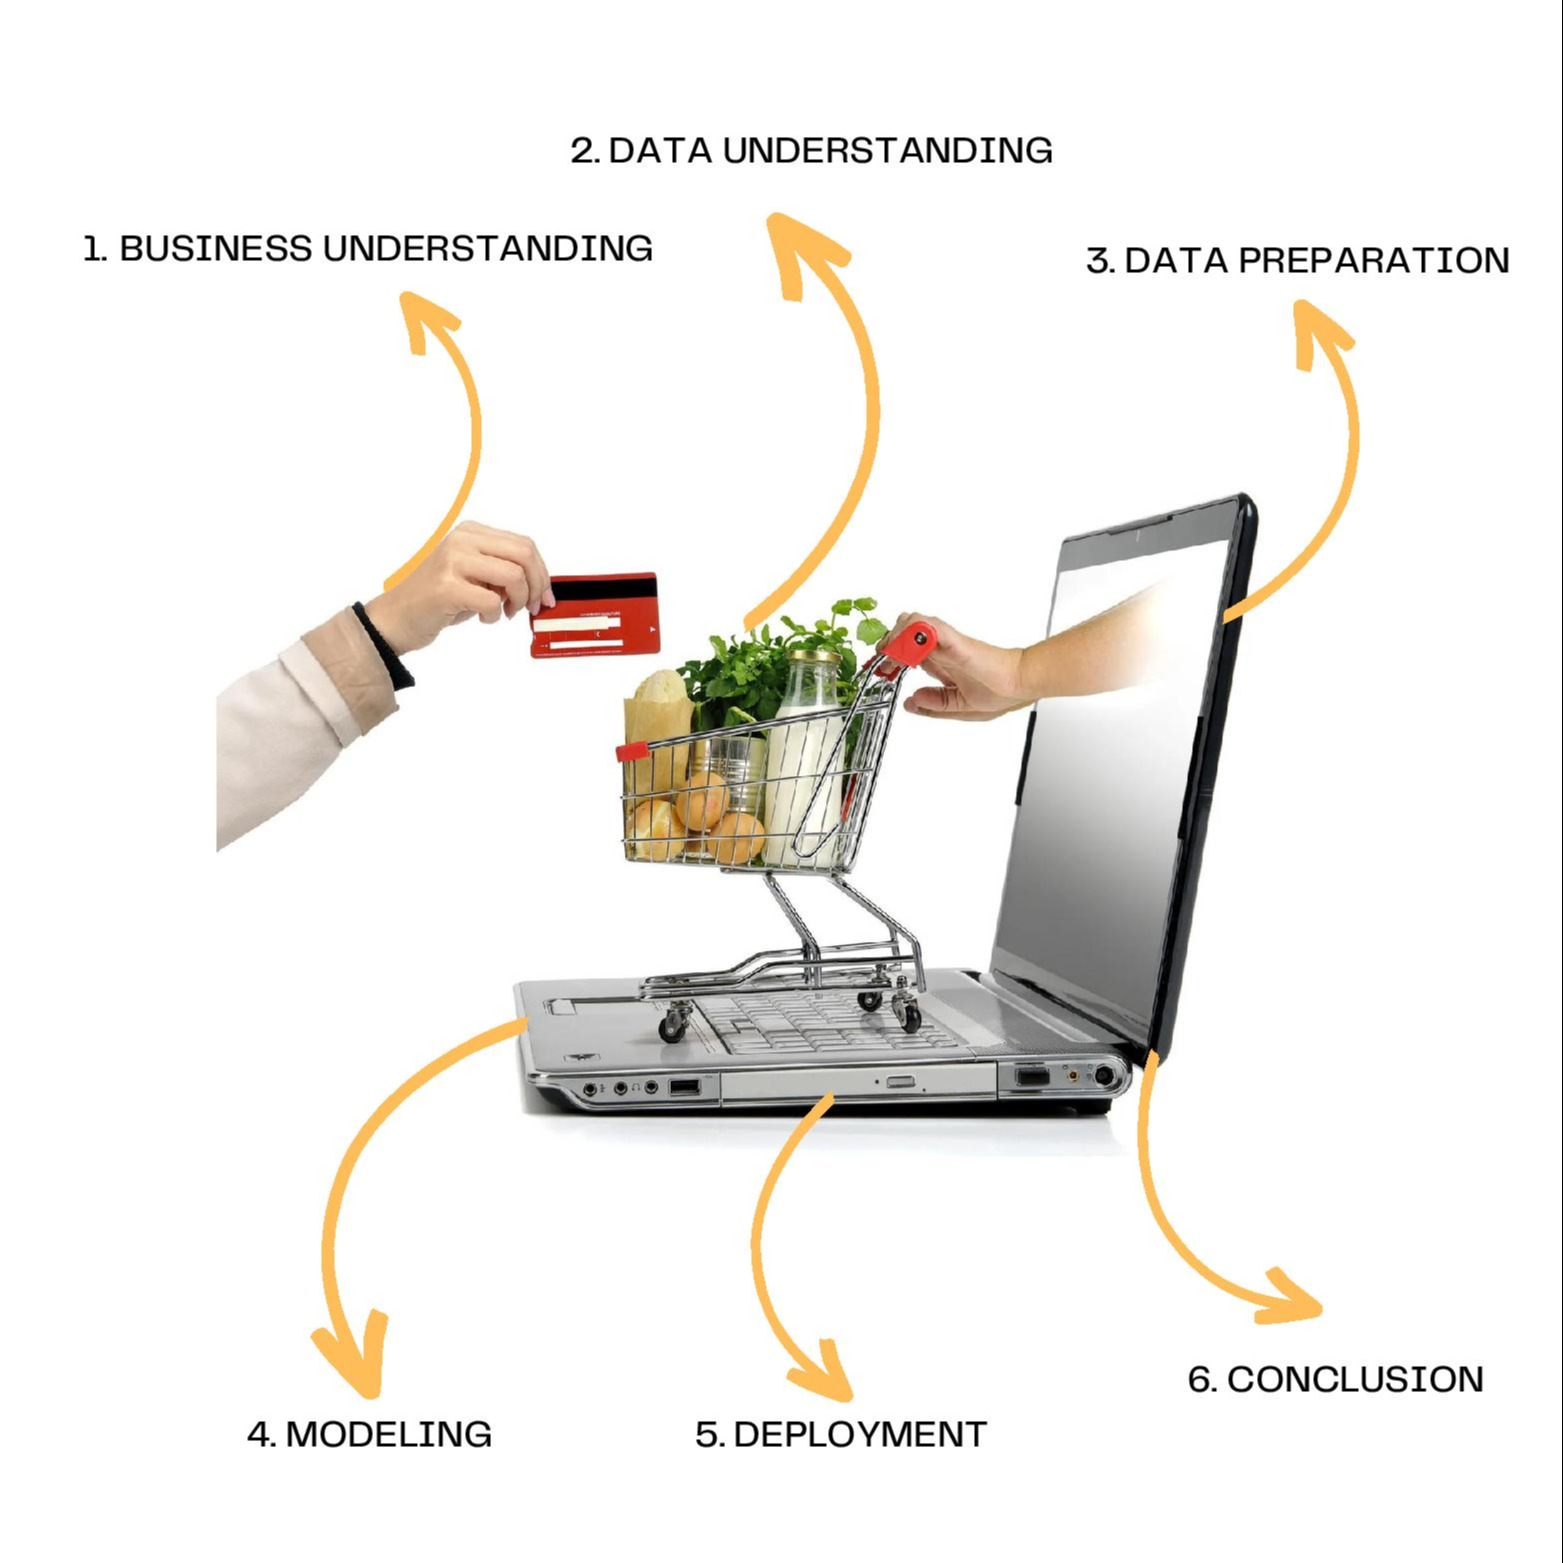

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#be6f37;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p> 

[OVERVIEW](#0)
- [1. BUSINESS UNDERSTANDING](#1)

- [2. DATA UNDERSTANDING](#2)

    - [2.1 Get information on the data](#2.1)
    - [2.2 Conducting summary statistics](#2.2)
    - [2.3 Taking care of Null values](#2.3)
    - [2.4 Converting data types](#2.4)
- [3. DATA PREPARATION](#3)
    - [3.1 Investigating all elements within each feature](#3.1)
    - [3.2 Aggregating & grouping values to visualize purchasing behaviour](#3.2)
    - [3.3 Creating time based features](#3.3)
    - [3.4  Heatmap Study](#3.4)
    - [3.5  Visualizing order time period](#3.5)
    - [3.6 Creating order group feature](#3.6)
    - [3.7 Visualizing order group feature](#3.7)
    - [3.8 Visualizing top 10 products](#3.8)
    - [3.9 Visualizing bottom 10 products](#3.9)
    - [3.9 Aggregating & grouping values to understand purchasing behaviour](#3.10)
    - [3.10 Aggregating & grouping values to understand product reordered ratio](#3.11)
    - [3.11 Aggregating & grouping values to visualize reordered ratio](#3.12)

- [4. MODELING](#4)

    - [4.1 Preparing & building apriori algorithm](#4.1)
    - [4.2 Building customized plot parameters](#4.2)
    - [4.3 Building the frequent occurrence iteams](#4.3)
    - [4.4 Adding Iteam sets count to the frequent items list](#4.4)

- [5. DEPLOYMENT](#5)
    - [5.1 Causal Inference Models & Relationships Strategy](#5.1)
- [6. CONCLUSION](#6)

In [2]:
# IMPORTING PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio
import seaborn as sns
from datetime import datetime
import sklearn
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.cluster import KMeans , k_means
from IPython.display import Image, display, HTML
import warnings
warnings.filterwarnings('ignore')

In [3]:
main_data= pd.read_csv("/kaggle/input/ecommerce-dataset-for-predictive-marketing-2023/ECommerce_consumer behaviour.csv")
df = main_data.copy()
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


<a id="2"></a>  
<p style="background-color:#be6f37;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> DATA UNDERSTANDING</p>

#### **The dataset consists of 2019501 Rows & 12 Columns which are as follows :**

- order_id – (A unique number to identity the order)
- user_id - (A unique number to identify the user)
- order_number – (Number of the order)
- order_dow – (Day of the Week the order was made)
- order_hour_of_day – (Time of the order)
- days_since_prior_order - (History of the order)
- product_id – (Id of the product)
- add_to_cart_order – (Number of items added to cart)
- reordered – (If the reorder took place)
- department_id - (Unique number allocated to each department)
- department – (Names of the departments)
- product_name – (Name of the products)

<a id="2.1"></a>
## <b>2.1<span style='color:#be6f37'> Get information on the data</span></b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


<a id="2.2"></a>
## <b>2.2 <span style='color:#be6f37'> Conducting summary statistics</span></b>

In [5]:
df.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

#### <b><span style='color:#FF0000'> NOTE :</span></b>

**From the above summary statistics we could see that we have null value in “ days_since_prior_order” which is 6.8 % of the entire data set. The following are the steps we will do to further continue on the explanatory analysis in sequential order.**

In [6]:
df['days_since_prior_order'].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

<a id="2.3"></a>
## <b>2.3 <span style='color:#be6f37'> Taking care of Null values</span></b>

In [7]:
# TAKING CARE OF NULL VALUES
for col in df.columns:
    if df[col].dtypes == 'float64':
        df[col].fillna(-1,inplace=True) 

In [8]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [9]:
df.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

<a id="2.4"></a>
## <b>2.4 <span style='color:#be6f37'> Converting data types</span></b>

In [10]:
# CONVERTING DATA TYPES
df['days_since_prior_order']= df['days_since_prior_order'].astype(np.int64)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


<a id="3"></a>
<p style="background-color:#be6f37;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> DATA PREPARATION</p>

<a id="3.1"></a>
## <b>3.1 <span style='color:#be6f37'> Investigating all elements within each feature</span></b>

In [12]:
for colum in df:
    unique_values = np.unique(df[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))

The number of unique values for features order_id : 200000
The number of unique values for features user_id : 105273
The number of unique values for features order_number : 100
The number of unique values for features order_dow : 7 --- [0 1 2 3 4 5 6]
The number of unique values for features order_hour_of_day : 24
The number of unique values for features days_since_prior_order : 32
The number of unique values for features product_id : 134
The number of unique values for features add_to_cart_order : 137
The number of unique values for features reordered : 2 --- [0 1]
The number of unique values for features department_id : 21 --- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
The number of unique values for features department : 21 --- ['alcohol' 'babies' 'bakery' 'beverages' 'breakfast' 'bulk' 'canned goods'
 'dairy eggs' 'deli' 'dry goods pasta' 'frozen' 'household'
 'international' 'meat seafood' 'missing' 'other' 'pantry' 'personal care'
 'pets' 'produce' 'snacks']

<a id="3.2"></a>
## <b>3.2 <span style='color:#be6f37'> Aggregating & grouping values to visualize purchasing behaviour</span></b>

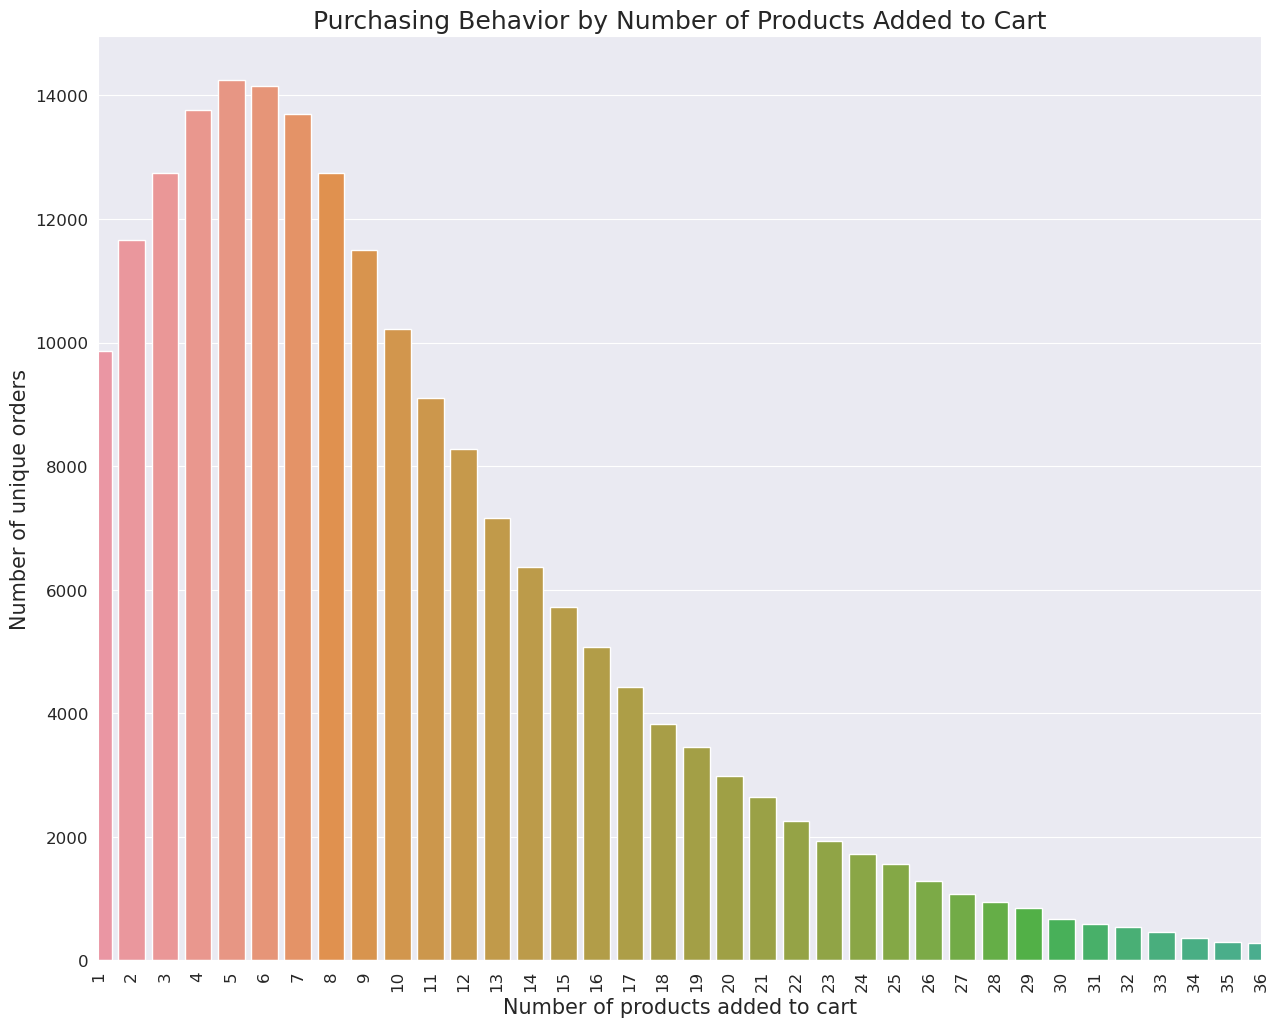

In [13]:
# AGGREGATING & GROUPING VALUES TO VISUALIZE PURCHASING BEHAVIOUR
grouped = df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('dark')
sns.set_palette("rocket_r")
f, ax = plt.subplots(figsize=(15, 12))
sns.barplot(x=grouped.index, y=grouped.values, ax=ax)
ax.grid(True, axis='y')
plt.xticks(rotation='vertical', fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Number of unique orders', fontsize=15)
plt.xlabel('Number of products added to cart', fontsize=15)
plt.title('Purchasing Behavior by Number of Products Added to Cart', fontsize=18)
plt.xlim(0, 35)  # limit the X axis values to 35
plt.show()

#### <b><span style='color:#FF0000'> NOTE :</span></b>
**From the above plot we can understand the purchasing behavior of the customers, where we could observe that customers are usually ordering on average around 4-7 products.**

<a id="3.3"></a>
## <b>3.3 <span style='color:#be6f37'> Creating time based features</span></b>

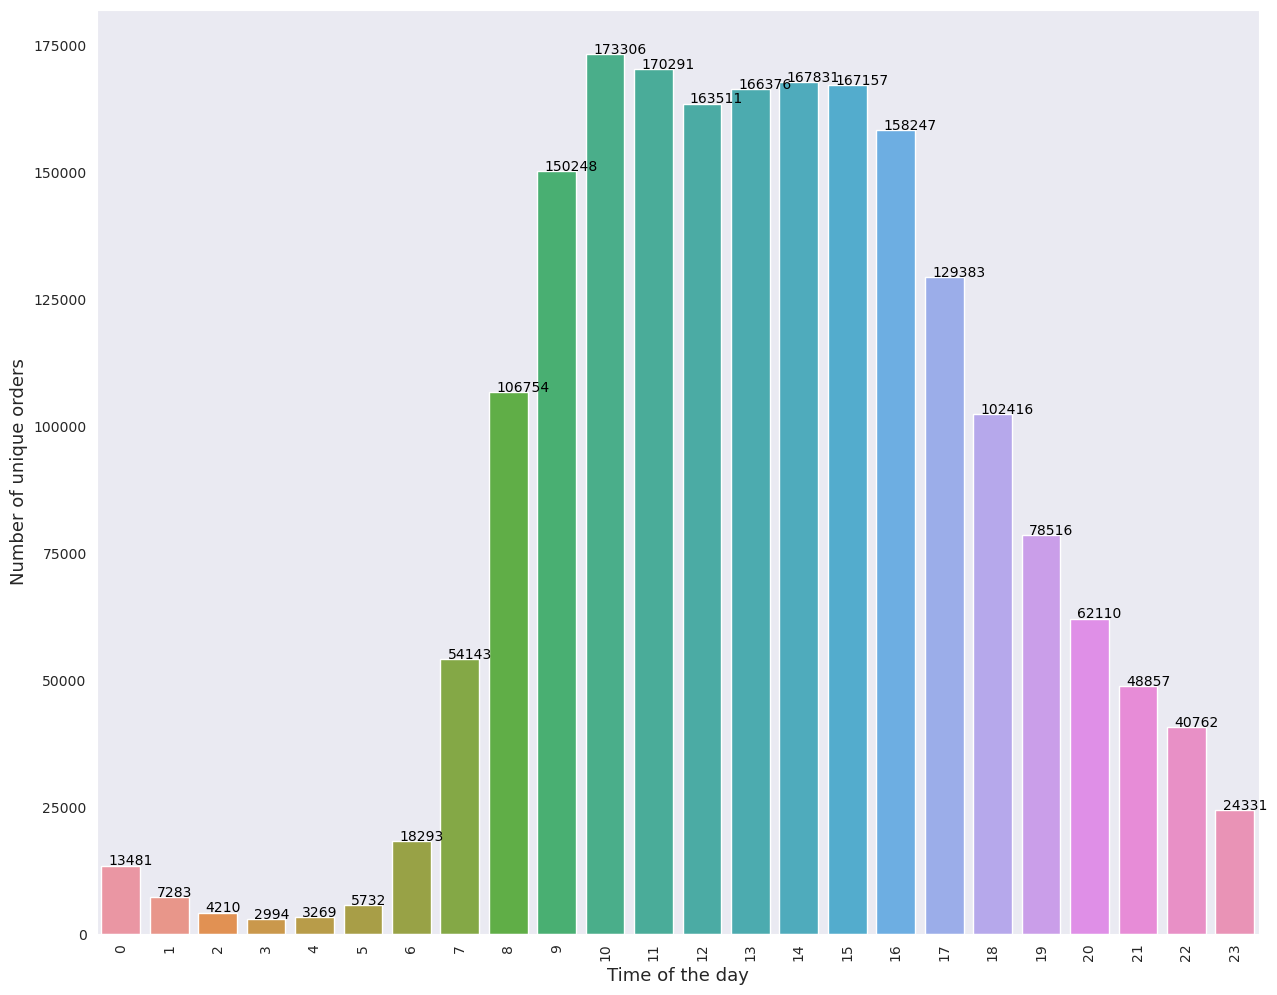

In [14]:
# TIME OF THE DAY WHEN THE ORDER WAS MADE
grouped = df.groupby('order_hour_of_day', as_index=True).agg({'user_id':'count'}).sort_values(by='user_id',ascending=False)


f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x = grouped.index, y = grouped.user_id)
sns.color_palette("rocket_r", 10)

plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Time of the day', fontsize=13)

for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+50, str(round(i.get_height())), fontsize=10, color='black')
plt.show()

plt.show()

#### <b><span style='color:#FF0000'> NOTE :</span></b>
**From the above plot we can understand a trend where majority of customers ordered between 10 AM - 4 PM**

<a id="3.4"></a>
## <b>3.4 <span style='color:#be6f37'> Heatmap Study</span></b>

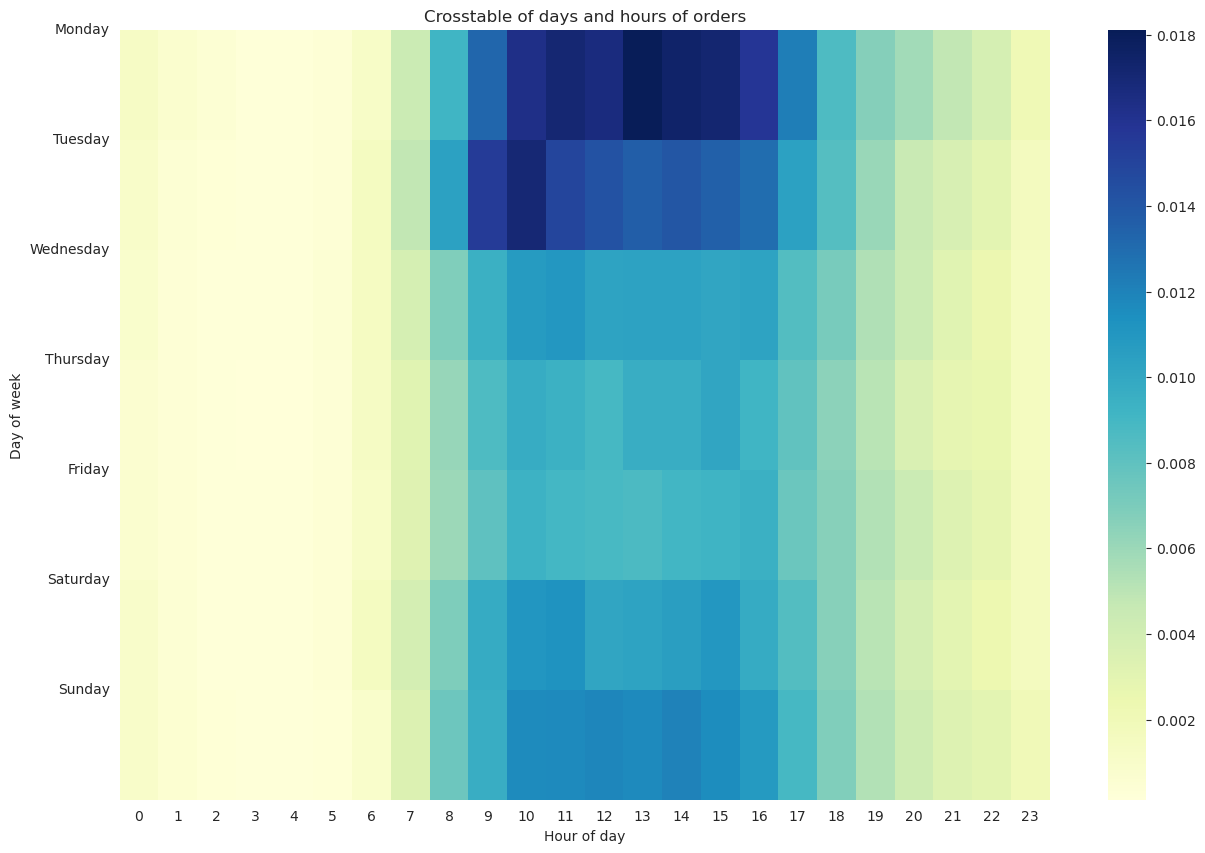

In [15]:
day_hour_df = df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
day_hour_df_piv = day_hour_df.pivot('order_dow', 'order_hour_of_day', 'order_number')/df.shape[0]

plt.figure(figsize=(15,10))
sns.heatmap(day_hour_df_piv, cmap='YlGnBu')
plt.yticks([0,1, 2, 3, 4, 5, 6],["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Hour of day")
plt.yticks(rotation=0)
plt.ylabel("Day of week")


plt.title("Crosstable of days and hours of orders");

#### <b><span style='color:#FF0000'> NOTE :</span></b>
**As we continue to explore further we can observe interesting trends which are as follows:**
- **The peak traffic is on a Monday between 10 AM  - 16 PM which is the beginning of the week**
- **The low periods happen to be during the mid-week from Wednesday - Friday From 4 PM onwards**

In [16]:
def order_time(x):
    return f'{"morning" if x in range(6, 12) else "afternoon" if x in range(12, 18) else "evening" if x in range(18, 23) else "night"}'


In [17]:
df['order_time_period'] = df['order_hour_of_day'].apply(order_time)
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_period
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients,evening
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree,evening
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter,evening
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables,evening
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables,evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,evening
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,evening
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,evening
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,evening


In [18]:
df.pivot_table(index='order_dow',columns='order_time_period',values='user_id',aggfunc=['count'])

count                       
order_time_period afternoon evening morning  night
order_dow                                         
0                    196603   60195  123876  11157
1                    158970   51825  129591   8850
2                    120927   45497   87562   7926
3                    112185   41737   77609   7199
4                    107170   45359   74338   8017
5                    121577   42311   89662   8607
6                    135073   45737   90397   9544

<a id="3.5"></a>
## <b>3.5 <span style='color:#be6f37'> Visualizing order time period</span></b>

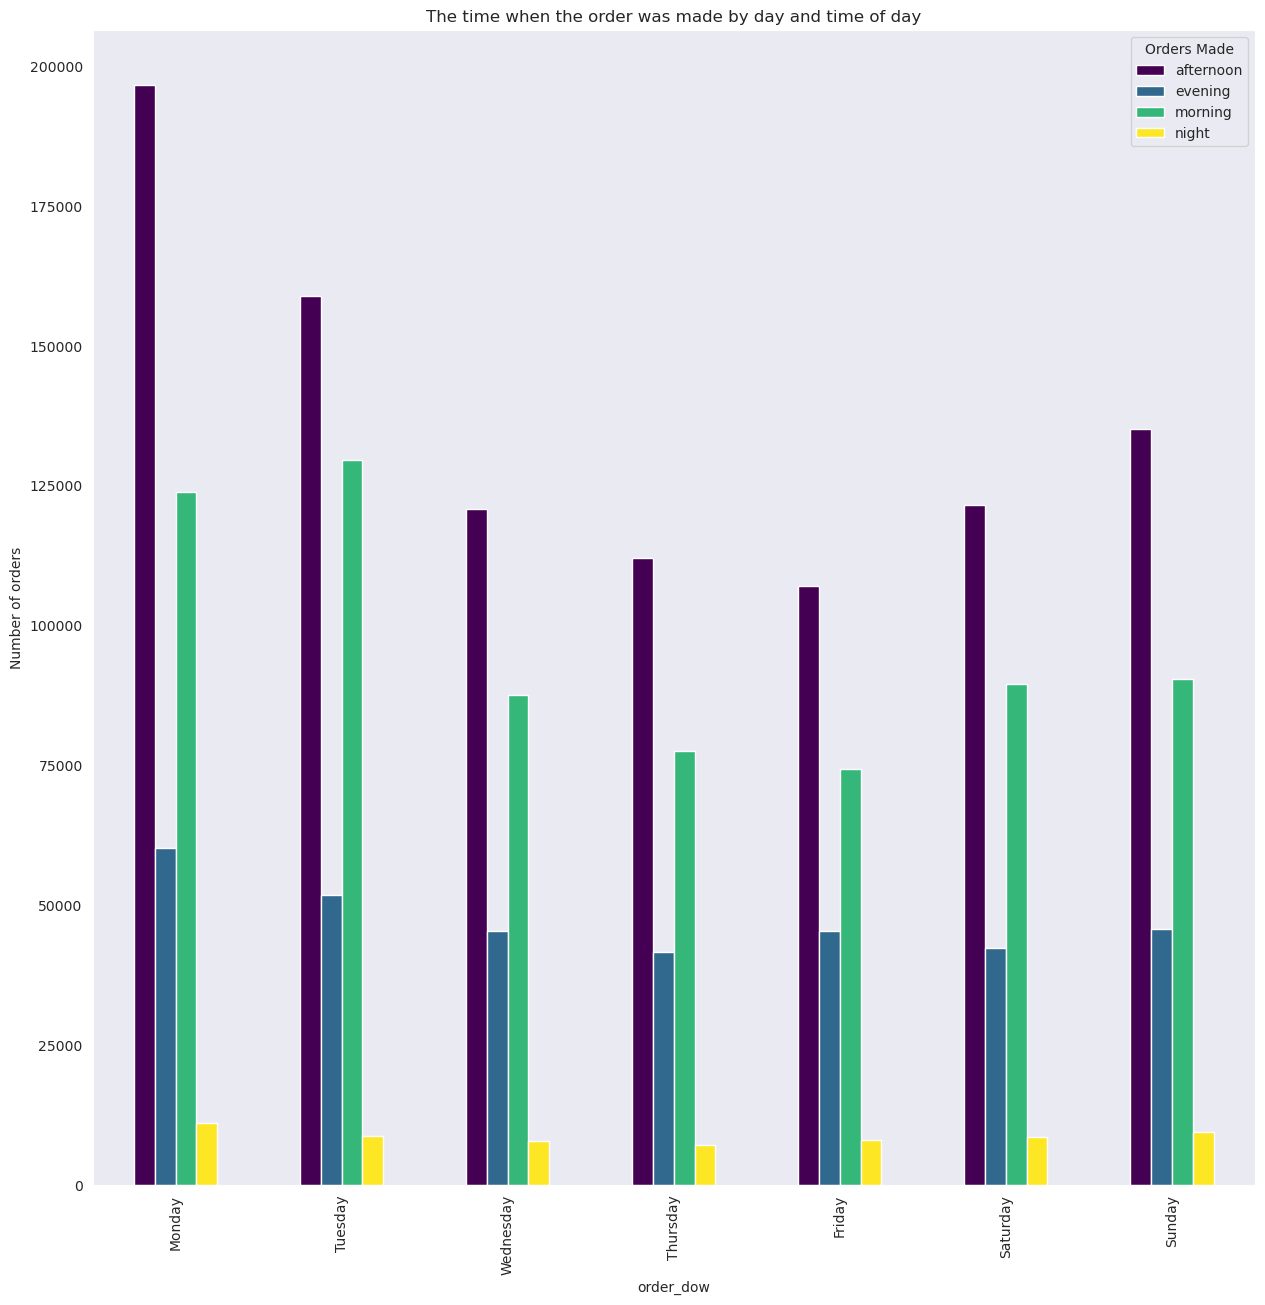

In [19]:
# Define the color palette
color_palette = plt.get_cmap('viridis')

# Generate the plot
orders_by_day_time = df.pivot_table(
    index='order_dow',
    columns='order_time_period',
    values='user_id',
    aggfunc='count'
)

ax = orders_by_day_time.plot(kind='bar', figsize=(15, 15), color=color_palette(np.linspace(0, 1, len(orders_by_day_time.columns))))
ax.set_title('The time when the order was made by day and time of day')
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]) # fixed the x-axis labels
ax.set_ylabel('Number of orders')
ax.legend(title='Orders Made', bbox_to_anchor=(1.0, 1.0))
plt.show()


#### <b><span style='color:#FF0000'> NOTE :</span></b>
**The above plot again give us a global overview where we can observe trends:**
- **Where most customers prefer to order between morning and early afternoon**
- **Relatively quiet few customers order during evenig and night**

<a id="3.6"></a>
## <b>3.6 <span style='color:#be6f37'> Creating order group feature</span></b>

In [20]:
def order_number_group(num_orders):
    ranges = [(1, 10), (11, 20), (21, 30), (31, 40), (41, 50),(51, 60),(61, 70),(71, 80),(81, 90),(91, 100)]
    for r in ranges:
        if num_orders in range(r[0], r[1]+1):
            return f"{r[0]}-{r[1]} orders"
    return "More than 100 orders"

In [21]:
df['order_number_group']=df['order_number'].apply(order_number_group)
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_period,order_number_group
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients,evening,1-10 orders
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree,evening,1-10 orders
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter,evening,1-10 orders
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables,evening,1-10 orders
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables,evening,1-10 orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,evening,11-20 orders
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,evening,41-50 orders
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,evening,41-50 orders
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,evening,41-50 orders


<a id="3.7"></a>
## <b>3.7 <span style='color:#be6f37'> Visualizing order group feature</span></b>

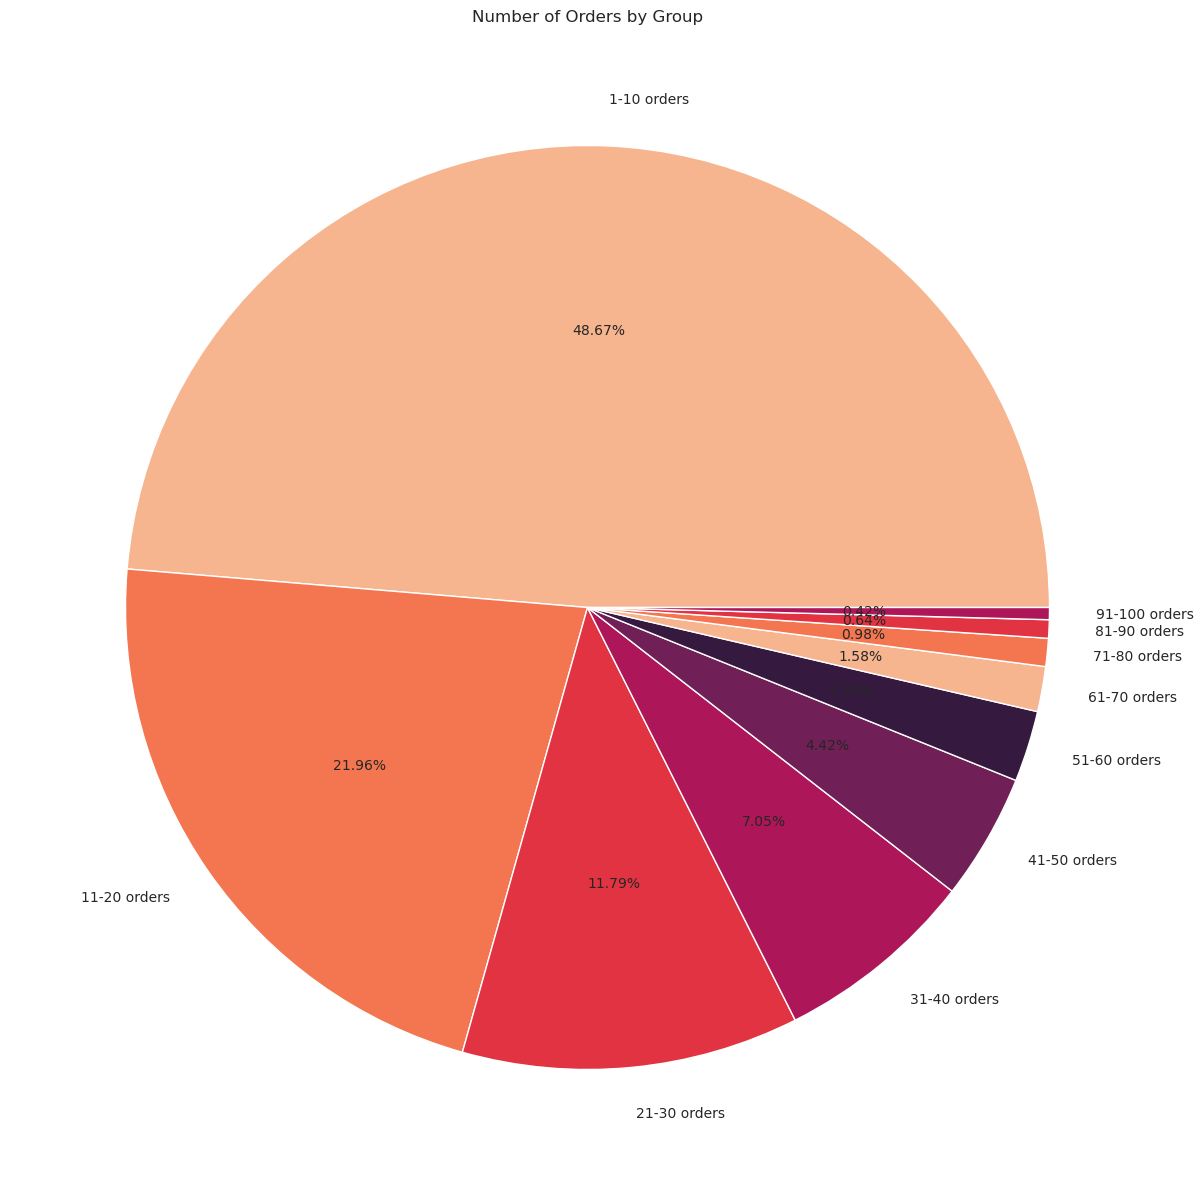

In [22]:
orders_by_group = df.groupby('order_number_group')['user_id'].count().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(15, 15))
ax.set_facecolor('lightgray')

orders_by_group.plot(kind='pie', autopct='%1.2f%%', title='Number of Orders by Group', ax=ax)
ax.set_ylabel('')

plt.show()

#### <b><span style='color:#FF0000'> NOTE :</span></b>
**The above pie chart give us a global overview of market basket analysis trend:**
- **Out of all the products, approximately 49% were purchased from the category 1-10 group**

<a id="3.8"></a>
## <b>3.8 <span style='color:#be6f37'> Visualizing top 10 products</span></b>

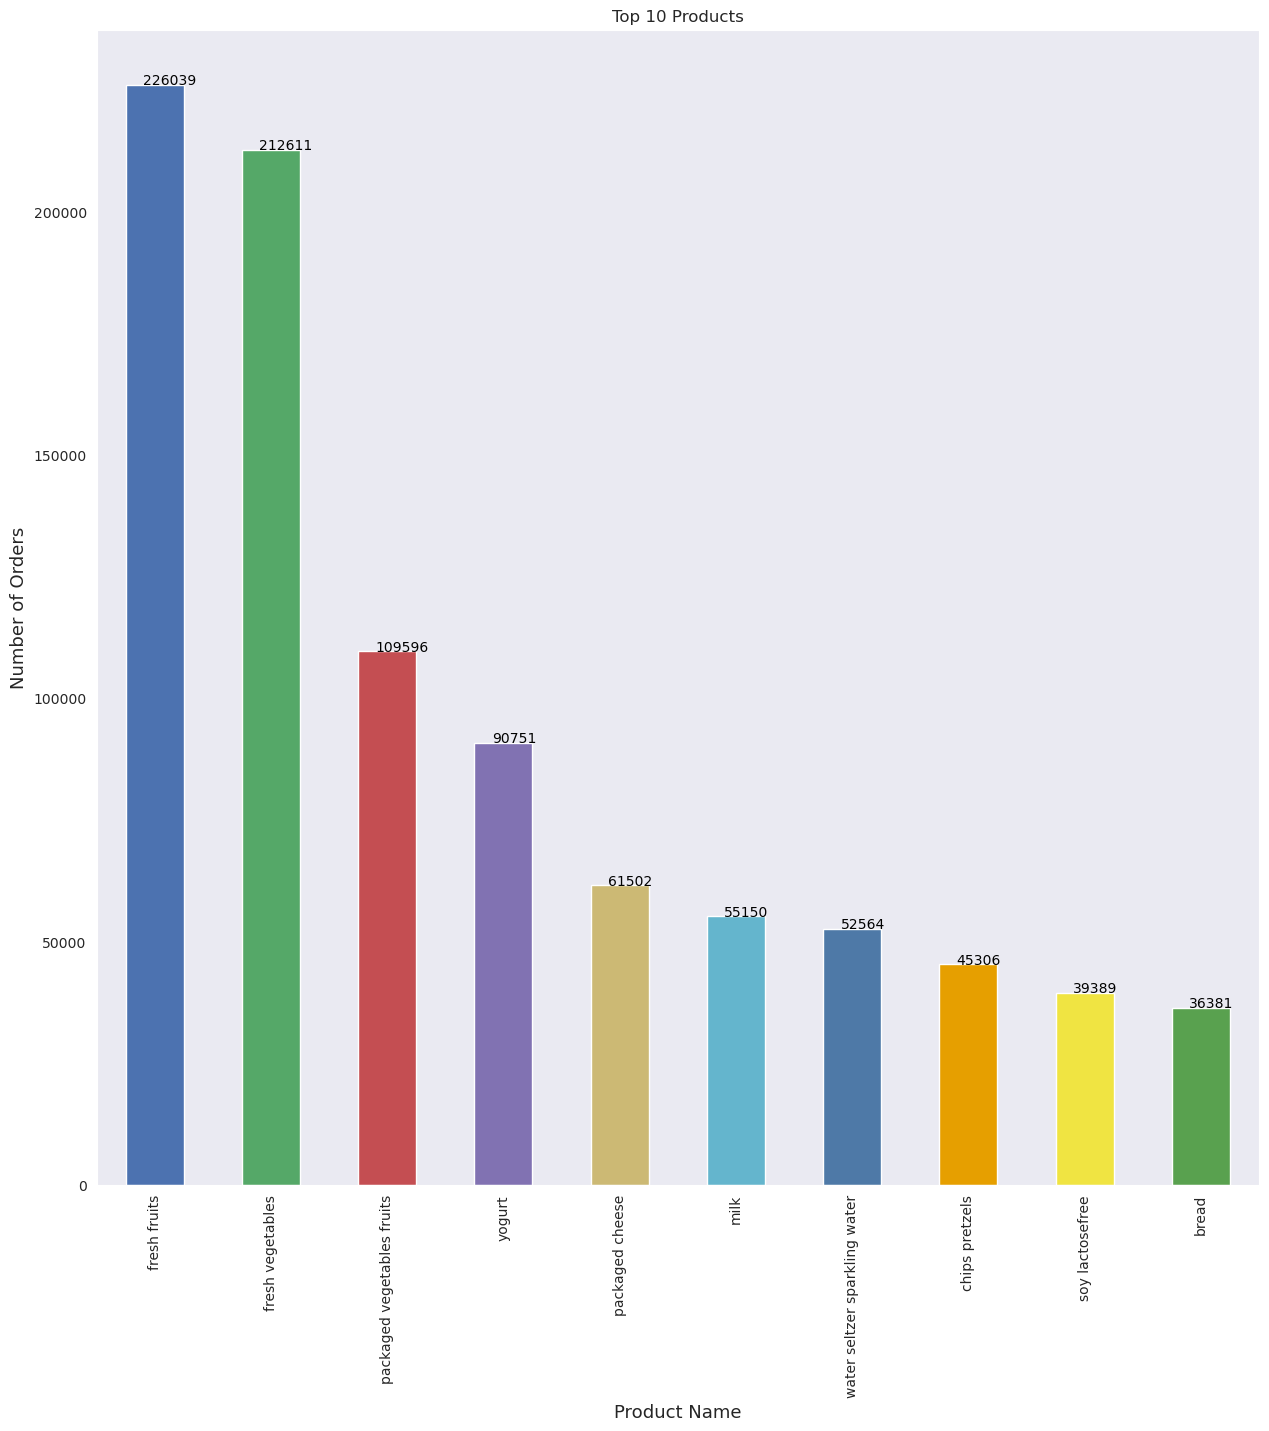

In [23]:
top_products = df.groupby('product_name')['user_id'].count().sort_values(ascending=False).head(10)
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#4E79A7', '#E69F00', '#F0E442', '#59A14F', '#8C8C8C', '#9C755F', '#EDB8A7', '#BDBDBD', '#000000']
ax = top_products.plot(kind='bar', title='Top 10 Products', color=colors, figsize=(15, 15))
plt.xlabel('Product Name',fontsize=13)
plt.ylabel('Number of Orders',fontsize=13)
for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+50, str(round(i.get_height())), fontsize=10, color='black')
plt.show()

<a id="3.9"></a>
## <b>3.9 <span style='color:#be6f37'> Visualizing bottom 10 products</span></b>

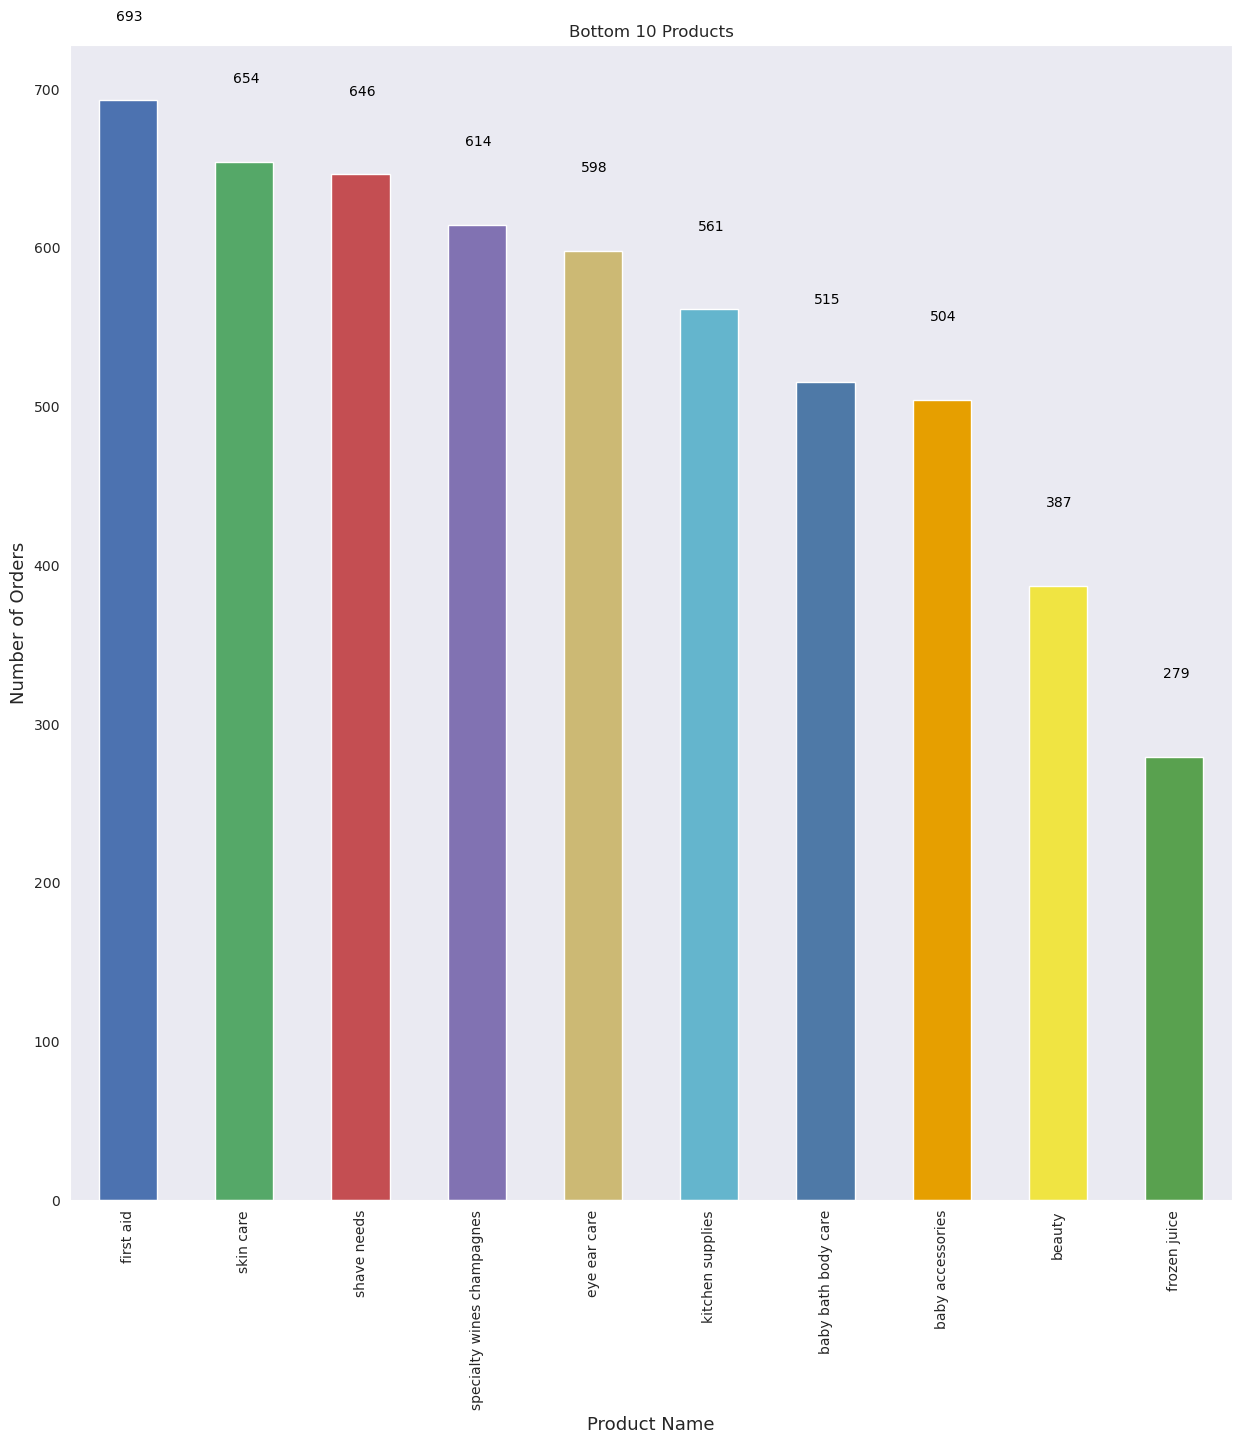

In [24]:
bottom_products = df.groupby('product_name')['user_id'].count().sort_values(ascending=False).tail(10)
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#4E79A7', '#E69F00', '#F0E442', '#59A14F', '#8C8C8C', '#9C755F', '#EDB8A7', '#BDBDBD', '#000000']
ax = bottom_products.plot(kind='bar', title='Bottom 10 Products', color=colors, figsize=(15, 15))
plt.xlabel('Product Name',fontsize=13)
plt.ylabel('Number of Orders',fontsize=13)
for i in ax.patches:
    ax.text(i.get_x()+0.15, i.get_height()+50, str(round(i.get_height())), fontsize=10, color='black')
plt.show()

<a id="3.10"></a>
## <b>3.10 <span style='color:#be6f37'> Aggregating & grouping values to understand purchasing behaviour</span></b>

In [25]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PURCHASING BEHAVIOUR
grouped = df.groupby(["product_id","product_name","department","order_time_period"])["reordered"].aggregate('count').reset_index()
grouped = grouped.sort_values(by='reordered', ascending=False)[:15].reset_index()
del grouped["index"]
grouped

,product_id,product_name,department,order_time_period,reordered
0,24,fresh fruits,produce,afternoon,104177
1,83,fresh vegetables,produce,afternoon,102115
2,24,fresh fruits,produce,morning,77479
3,83,fresh vegetables,produce,morning,68634
4,123,packaged vegetables fruits,produce,afternoon,51493
5,120,yogurt,dairy eggs,afternoon,41484
6,24,fresh fruits,produce,evening,37544
7,123,packaged vegetables fruits,produce,morning,36210
8,83,fresh vegetables,produce,evening,35026
9,120,yogurt,dairy eggs,morning,31412


#### <b><span style='color:#FF0000'> NOTE :</span></b>
**From the above table we can clearly observe that produce, dairy products, beverages and snacks are the top categories the 
customers are most interested to purchase**

<a id="3.11"></a>
## <b>3.11 <span style='color:#be6f37'> Aggregating & grouping values to understand product reordered ratio</span></b>

In [26]:
# AGGREGATING & GROUPING VALUES TO UNDERSTAND PRODUCT REORDERED RATIO
grouped = df.groupby("reordered")["product_id"].aggregate('count').reset_index()
grouped['Ratio'] = grouped["product_id"].apply(lambda x: x /grouped['product_id'].sum())
grouped

,reordered,product_id,Ratio
0,0,828515,0.410257
1,1,1190986,0.589743


<a id="3.12"></a>
## <b>3.12 <span style='color:#be6f37'> Aggregating & grouping values to visualize reordered ratio</span></b>

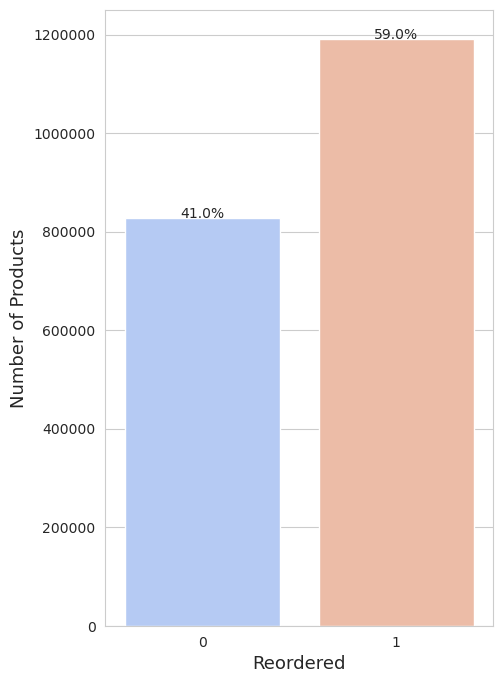

In [27]:
grouped = grouped.groupby(['reordered']).sum()['product_id'].sort_values(ascending=True)

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 8))
sns.barplot(x=grouped.index, y=grouped.values, palette='coolwarm')

grouped_pct = grouped/grouped.sum() * 100
for i, v in enumerate(grouped.values):
    ax.text(i, v+3, f'{grouped_pct.values[i]:.1f}%', ha='center', fontsize=10)

plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

#### <b><span style='color:#FF0000'> NOTE :</span></b>
**From the above we can see that 59 % of products were reordered by customers.**

<a id="4"></a>
<p style="background-color:#be6f37;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> MODELING</p>

<a id="4.1"></a>
## <b> 4.1 <span style='color:#be6f37'> Apriori algorithm </span></b>


The Apriori algorithm is a popular algorithm used in data mining to find frequent itemsets in a dataset. It works by scanning the dataset to identify commonly occurring items, and then uses this information to generate rules about which items tend to appear together. The algorithm has two main steps:
 
1. The first step involves identifying all itemsets that meet a specified minimum support threshold (i.e., the minimum number of occurrences required for an itemset to be considered frequent). This is known as the "frequent itemset generation" step.
2.The second step involves using the frequent itemsets generated in step one to generate association rules, which are rules that describe the relationships between different items in the dataset. These rules can be used to predict which items are likely to be purchased together, or to identify which items are commonly associated with one another.
 
**Additionally Apriori algorithm is widely used in retail and e-commerce industries for market basket analysis, which involves analyzing customer purchase patterns to identify which items are frequently purchased together.**
 


In [28]:
pd.set_option('display.max_colwidth', -1)

In [29]:
df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name,order_time_period,order_number_group
0,2425083,49125,1,2,18,-1,17,1,0,13,pantry,baking ingredients,evening,1-10 orders
1,2425083,49125,1,2,18,-1,91,2,0,16,dairy eggs,soy lactosefree,evening,1-10 orders
2,2425083,49125,1,2,18,-1,36,3,0,16,dairy eggs,butter,evening,1-10 orders
3,2425083,49125,1,2,18,-1,83,4,0,4,produce,fresh vegetables,evening,1-10 orders
4,2425083,49125,1,2,18,-1,83,5,0,4,produce,fresh vegetables,evening,1-10 orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5,83,8,0,4,produce,fresh vegetables,evening,11-20 orders
2019497,458285,128787,42,2,19,3,115,1,1,7,beverages,water seltzer sparkling water,evening,41-50 orders
2019498,458285,128787,42,2,19,3,32,2,1,4,produce,packaged produce,evening,41-50 orders
2019499,458285,128787,42,2,19,3,32,3,1,4,produce,packaged produce,evening,41-50 orders


<a id="4.2"></a>
## <b> 4.2 <span style='color:#be6f37'> Building customized plot parameters </span></b>

In [30]:
def bar_plot(df,col):

    fig = px.bar(df,
        x = df[col].value_counts().keys(), 
        y = df[col].value_counts().values,
        color= df[col].value_counts().keys()
    )
    fig.update_layout(
    xaxis_title= col,
    yaxis_title="Count",
    legend_title=col,
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)
    
    fig.show()

In [31]:
# PRODUCT BAR PLOT 
bar_plot(df, 'product_name')

In [32]:
new_df = df.groupby(['user_id','department'])['product_name'].apply(sum)
new_df

user_id  department
2        dairy eggs    packaged cheesepackaged cheese                                
         deli          lunch meatprepared soups saladsfresh dips tapenades           
         produce       fresh fruitsfresh fruitsfresh fruits                          
         snacks        popcorn jerkycrackerschips pretzels                           
3        beverages     water seltzer sparkling water                                 
                                   ...                                               
206209   frozen        frozen produce                                                
         household     laundrytrash bags linersfood storagedish detergents           
         pantry        spices seasonings                                             
         produce       packaged vegetables fruitsfresh fruitsfresh fruitsfresh fruits
         snacks        crackerscrackers                                              
Name: product_name, Length: 639006

In [33]:
transactions = [a[1]['product_name'].tolist() for a in list(df.groupby(['user_id','department']))]

In [34]:
# DISPLAYING 20 PAIRS OF TRANSACTION 
first_20_transactions = transactions[:20]

# PRINT HEAD OF 20 Print head of 20 transactions
for i, transaction in enumerate(first_20_transactions):
    print(f"Transaction {i+1}: {transaction}")

Transaction 1: ['packaged cheese', 'packaged cheese']
Transaction 2: ['lunch meat', 'prepared soups salads', 'fresh dips tapenades']
Transaction 3: ['fresh fruits', 'fresh fruits', 'fresh fruits']
Transaction 4: ['popcorn jerky', 'crackers', 'chips pretzels']
Transaction 5: ['water seltzer sparkling water']
Transaction 6: ['other creams cheeses', 'packaged cheese', 'soy lactosefree', 'soy lactosefree', 'soy lactosefree']
Transaction 7: ['ice cream ice', 'frozen breakfast']
Transaction 8: ['paper goods']
Transaction 9: ['spreads']
Transaction 10: ['fresh fruits', 'packaged vegetables fruits', 'fresh fruits', 'fresh fruits', 'packaged vegetables fruits', 'packaged vegetables fruits']
Transaction 11: ['nuts seeds dried fruit', 'nuts seeds dried fruit', 'crackers']
Transaction 12: ['bread']
Transaction 13: ['refrigerated', 'coffee', 'refrigerated', 'refrigerated', 'refrigerated', 'coffee', 'refrigerated']
Transaction 14: ['canned meals beans', 'canned fruit applesauce']
Transaction 15: ['p

In [35]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

In [36]:
# Get the head of 20 columns and create a list of dictionaries
head_cols = [{'Product': ' '.join(col)} for col in te.columns_[:20]]

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(head_cols)

# Display the DataFrame
print(df)

                                                    Product
0   a i r   f r e s h e n e r s   c a n d l e s            
1   a s i a n   f o o d s                                  
2   b a b y   a c c e s s o r i e s                        
3   b a b y   b a t h   b o d y   c a r e                  
4   b a b y   f o o d   f o r m u l a                      
5   b a k e r y   d e s s e r t s                          
6   b a k i n g   i n g r e d i e n t s                    
7   b a k i n g   s u p p l i e s   d e c o r              
8   b e a u t y                                            
9   b e e r s   c o o l e r s                              
10  b o d y   l o t i o n s   s o a p                      
11  b r e a d                                              
12  b r e a k f a s t   b a k e r y                        
13  b r e a k f a s t   b a r s   p a s t r i e s          
14  b u l k   d r i e d   f r u i t s   v e g e t a b l e s
15  b u l k   g r a i n s   r i c e   d 

In [37]:
#te.columns_
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [38]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)
pf = transactions.describe()
pf

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
count,639006,639006,639006,639006,639006,639006,639006,639006,639006,639006,...,639006,639006,639006,639006,639006,639006,639006,639006,639006,639006
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,638062,631396,638572,638554,632592,637201,625861,637761,638660,637531,...,625783,629963,633844,629603,637236,637208,636663,612103,637855,603025


In [39]:
f = pf.iloc[0]-pf.iloc[3]
a = f.tolist()
b = list(f.index)
item = pd.DataFrame([[a[r],b[r]]for r in range(len(a))], columns=['Count','Item'])
item = item.sort_values(['Count'], ascending=False).head(50)
transactions

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
639002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
639003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
639004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
item

,Count,Item
50,66823,fresh fruits
53,56265,fresh vegetables
98,49230,packaged vegetables fruits
133,35981,yogurt
93,34049,packaged cheese
83,32024,milk
131,26903,water seltzer sparkling water
25,25682,chips pretzels
11,24363,bread
119,24001,soy lactosefree


In [41]:
pio.renderers.default = "notebook_connected"
# TREEMAP VISUALIZATION OF ITEMS
fig = px.treemap(item, path=['Item'], values='Count')
fig.update_layout(title='Visualizing Item Counts with a Treemap', title_font_size=20, title_x=0.5)
fig.show()

<a id="4.3"></a>
## <b> 4.3 <span style='color:#be6f37'> Building the frequent occurrence iteams </span></b>

In [42]:
freq_items = apriori(transactions, min_support=0.005, use_colnames=True, verbose=1)
freq_items.head(7)

Processing 5 combinations | Sampling itemset size 5


,support,itemsets
0,0.011909,(asian foods)
1,0.010037,(baby food formula)
2,0.020571,(baking ingredients)
3,0.038126,(bread)
4,0.016698,(breakfast bakery)
5,0.008551,(buns rolls)
6,0.019820,(butter)


<a id="4.4"></a>
## <b> 4.4 <span style='color:#be6f37'> Adding Iteam sets count to the frequent items list </span></b> 

In [43]:
# ADDING ITEAMSETS COUNT TO THE FREQUENT ITEAM LIST
freq_items['length'] = freq_items['itemsets'].apply(lambda x: len(x))

In [44]:
freq_items.head(10)

,support,itemsets,length
0,0.011909,(asian foods),1
1,0.010037,(baby food formula),1
2,0.020571,(baking ingredients),1
3,0.038126,(bread),1
4,0.016698,(breakfast bakery),1
5,0.008551,(buns rolls),1
6,0.019820,(butter),1
7,0.016790,(candy chocolate),1
8,0.006285,(canned fruit applesauce),1
9,0.019266,(canned jarred vegetables),1


In [45]:
freq_items.tail(10)

,support,itemsets,length
160,0.015864,"(packaged vegetables fruits, fresh vegetables, fresh herbs)",3
161,0.006750,"(other creams cheeses, packaged cheese, milk)",3
162,0.006617,"(other creams cheeses, yogurt, milk)",3
163,0.006573,"(packaged cheese, milk, soy lactosefree)",3
164,0.014086,"(packaged cheese, yogurt, milk)",3
165,0.007654,"(yogurt, milk, soy lactosefree)",3
166,0.007330,"(other creams cheeses, packaged cheese, yogurt)",3
167,0.009133,"(packaged cheese, yogurt, soy lactosefree)",3
168,0.005316,"(eggs, packaged cheese, yogurt, milk)",4
169,0.014585,"(fresh herbs, fresh fruits, packaged vegetables fruits, fresh vegetables)",4


### <b><span style='color:#FF0000'> DEMO</span></b>

In [46]:
freq_items[(freq_items['length']==3)&(freq_items['support']>=0.005)]

,support,itemsets,length
144,0.005894,"(packaged cheese, butter, milk)",3
145,0.005837,"(yogurt, butter, milk)",3
146,0.006061,"(packaged cheese, butter, yogurt)",3
147,0.005527,"(packaged cheese, milk, cream)",3
148,0.005793,"(yogurt, milk, cream)",3
149,0.005868,"(packaged cheese, yogurt, cream)",3
150,0.008014,"(eggs, packaged cheese, milk)",3
151,0.008557,"(eggs, yogurt, milk)",3
152,0.005310,"(eggs, packaged cheese, soy lactosefree)",3
153,0.008944,"(eggs, packaged cheese, yogurt)",3


#### <b><span style='color:#FF0000'> NOTE :</span></b>
**From the previously demonstrated process of identifying frequent individual items for three products using the Apriori algorithm, we can conclude that this method can be used to determine which products should be stocked together based on purchasing trends. By analyzing the items that are frequently purchased together, we can make informed decisions about product placement and inventory management to maximize sales and customer satisfaction..**

<a id="5"></a>
<p style="background-color:#be6f37;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> DEPLOYMENT </p>

<a id="5.1"></a>
## <b> 5.1 <span style='color:#be6f37'> Causal Inference Models & Relationships Strategy </span></b>

**Here are some ways in which a Hunter's e-grocery could use causal inference:**

- Identifying the impact of marketing campaigns: By analyzing data on customer purchases before and after a marketing campaign, a supermarket chain can use causal inference to determine whether the campaign had a causal impact on customer behavior, such as increased sales or higher customer engagement.
    
- Optimizing pricing strategies: Causal inference can be used to determine the optimal price point for different products by analyzing how price changes impact customer purchasing behavior. For example, a supermarket chain could use causal inference to determine whether lowering the price of a particular product will lead to increased sales and revenue.
    
- Improving customer satisfaction: By analyzing data on customer feedback and complaints, a supermarket chain can use causal inference to identify which factors have the strongest causal impact on customer satisfaction. This information can be used to make targeted improvements to store layout, product offerings, and customer service to improve overall customer satisfaction.
    
- Forecasting demand: Causal inference can be used to identify which factors have a causal impact on product demand, such as seasonality, weather patterns, and promotional offers. This information can be used to make more accurate demand forecasts, which can improve inventory management and reduce waste.
    
Overall, causal inference can provide valuable insights into which factors have a causal impact on customer behavior, which can help a supermarket chain make more informed decisions about marketing, pricing, inventory management, and customer service. The below is an example of a off-the-shelf tool that is arready in use from causaLens

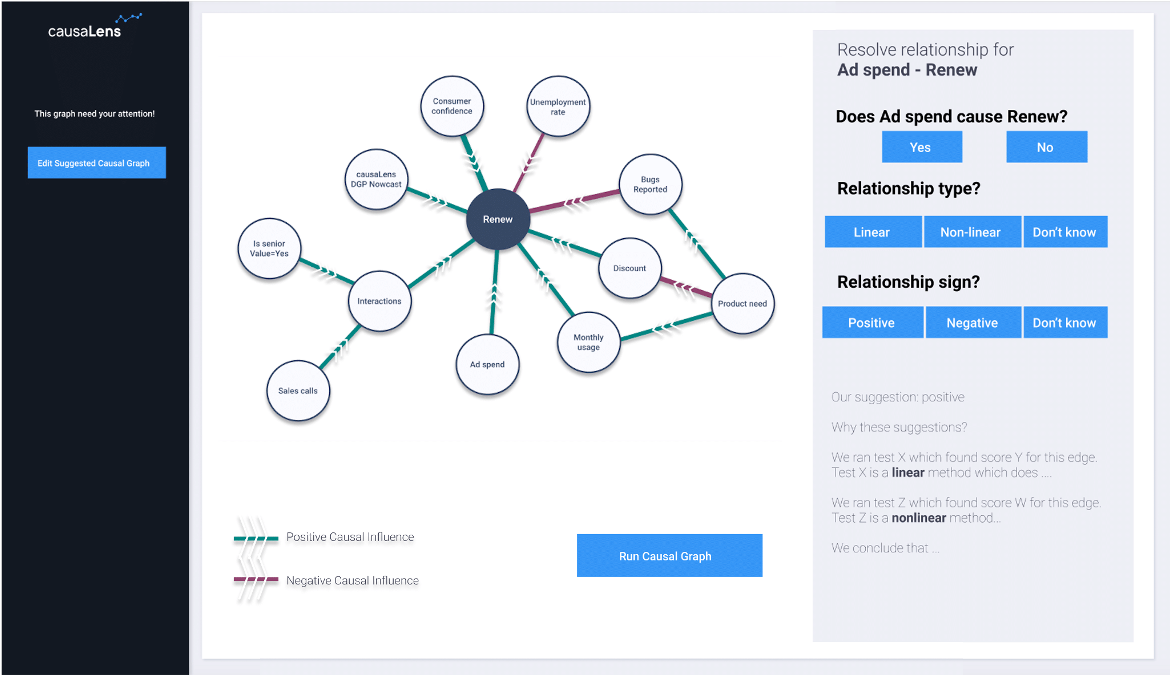

<a id="6"></a>
<p style="background-color:#be6f37;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> CONCLUSION / THANK YOU 😊</p>

### Hope you enjoyed going over my notebook

**Please share my kernel & data :[Supermarket dataset](https://www.kaggle.com/datasets/hunter0007/ecommerce-dataset-for-predictive-marketing-2023)💫**

**Feel free to post your questions in the comments and I would be happy to respond!**

**Cheers to all of you 🥂**
